In [1]:
import numpy as np
from process_data import load_data
from phased_lstm import trainer, plstmglucosemodel

In [2]:
xt: np.ndarray
xs: np.ndarray
xt_t: np.ndarray
ys: np.ndarray
loader: load_data.LoadData = load_data.LoadData()
xs, xt, xt_t, ys = loader.load_gluose_data_from_file(_filename="../data/2022112/salida.csv", _future_steps=2, _scaler=load_data.ScalerValues.MinMaxScaler)

Loading data_load from file ../data/2022112/salida.csv
Load data_load sucessfully..


In [4]:
xs_train: np.ndarray
xt_train: np.ndarray
xt_t_train: np.ndarray
ys_train: np.ndarray
xs_valid: np.ndarray
xt_valid: np.ndarray
xt_t_valid: np.ndarray
ys_valid: np.ndarray
xs_test: np.ndarray
xt_test: np.ndarray
xt_t_test: np.ndarray
ys_test: np.ndarray
(
    xs_train,
    xt_train,
    xt_t_train,
    ys_train,
    xs_valid,
    xt_valid,
    xt_t_valid,
    ys_valid,
    xs_test,
    xt_test,
    xt_t_test,
    ys_test,
) = load_data.split_all_data(xs, xt, xt_t, ys, 0.8, 0.1)


In [12]:
glucose_model: plstmglucosemodel.PlstmGlucoseModel = plstmglucosemodel.PlstmGlucoseModel(_input_dim=2,
                                                                                         _batch_size=1,
                                                                                         _hidden_dim=64,
                                                                                         _use_lstm=True,
                                                                                         _outputl1=512,
                                                                                         _dropout1=0.3,
                                                                                         _outputl2=256,
                                                                                         _dropout2=0.3,
                                                                                         _exp_func=True,
                                                                                         _nlf1="relu",
                                                                                         _nlf2="relu",
                                                                                         _batch_normalization=False)

events = []
trainer: trainer.Trainer = trainer.Trainer(_events=events, _model=glucose_model, _optimizer_name="adam", _train_data=(xs_train, xt_train, ys_train), _test_data=(xs_valid,xt_valid, ys_valid), _batch_size=1, _lr=1e-3, _epochs=epochs)

In [13]:
events = []
trainer_t: trainer.Trainer = trainer.Trainer(_events=events
                                           ,_model=glucose_model
                                           , _optimizer_name="adam"
                                           ,_train_data=(xs_train, xt_train, ys_train)
                                           ,_test_data=(xs_valid,xt_valid, ys_valid)
                                           ,_batch_size=1
                                           ,_lr=1e-3
                                           ,_epochs=10)

In [14]:
trainer_t.train_and_test(_epochs=10)

Epoch: 1 / 10 Test: 0.0441377275406203
Epoch: 1 / 10 Loss: 0.05243411660194397
Epoch: 2 / 10 Test: 0.042748860345699455
Epoch: 2 / 10 Loss: 0.03664425015449524
Epoch: 3 / 10 Test: 0.03607840115544895
Epoch: 3 / 10 Loss: 0.015846848487854004
Epoch: 4 / 10 Test: 0.039172171190490615
Epoch: 4 / 10 Loss: 0.03630852699279785
Epoch: 5 / 10 Test: 0.041354238537938466
Epoch: 5 / 10 Loss: 0.0073091983795166016
Epoch: 6 / 10 Test: 0.04284041568621242
Epoch: 6 / 10 Loss: 0.03403884172439575
Epoch: 7 / 10 Test: 0.037490305817537324
Epoch: 7 / 10 Loss: 0.019947588443756104
Epoch: 8 / 10 Test: 0.03341414908361973
Epoch: 8 / 10 Loss: 0.026198893785476685
Epoch: 9 / 10 Test: 0.03976791380795047
Epoch: 9 / 10 Loss: 0.06550288200378418
Epoch: 10 / 10 Test: 0.03607575662978025
Epoch: 10 / 10 Loss: 0.03993123769760132


In [15]:
import torch

In [21]:
torch.save(
    glucose_model.state_dict(),
    f"models/{glucose_model.getModelName()}"
)

In [31]:
y_pred = []
y_real = []
for i in range(0,xs_valid.shape[0]):
    xs_a = xs_valid[i]
    xt_a = xt_valid[i]
    y_real.append(ys_valid[i])
    output = glucose_model.predict(xs_a,xt_a)
    y_pred.append(output.item())

In [32]:
import matplotlib.pyplot as plt

(array([  21.,   68.,  305., 1239., 1711.,  377.,   68.,   11.,    5.,
           3.]),
 array([-0.17929103, -0.13161137, -0.08393171, -0.03625205,  0.01142762,
         0.05910728,  0.10678694,  0.1544666 ,  0.20214626,  0.24982593,
         0.29750559]),
 <BarContainer object of 10 artists>)

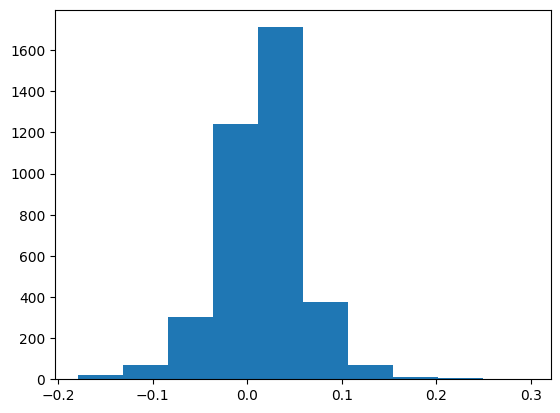

In [35]:
plt.hist(np.array(y_pred)-np.array(y_real))

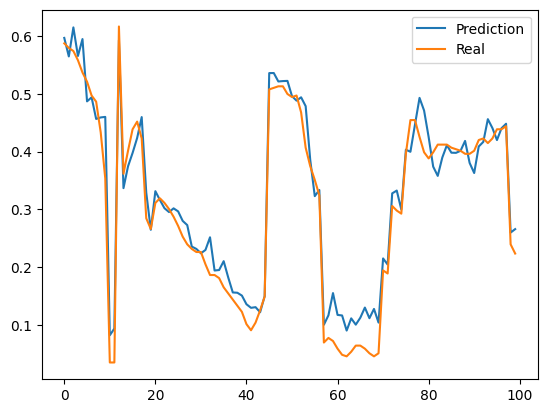

In [37]:
start = 1075
n_dif = 100
stop = start + n_dif
plt.plot(y_pred[start:stop],label="Prediction")
plt.plot(y_real[start:stop],label="Real")
plt.legend()
plt.show()